In [67]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [68]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1.讀入MNIST數據

In [69]:
from keras.datasets import mnist

In [70]:
(x_train0, y_train0),(x_test0, y_test0) = mnist.load_data()

# 2.格式整理

## 輸入數據

In [71]:
x_train = x_train0.reshape(x_train0.shape[0], x_train0.shape[1], x_train0.shape[2], 1)
x_test = x_test0.reshape(x_test0.shape[0], x_test0.shape[1], x_test0.shape[2], 1)

# 歸一化
x_train = x_train-x_train.min()
x_train = x_train/x_train.max()
x_test = x_test-x_test.min()
x_test = x_test/x_test.max()
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

# 確認格式
print(x_train[100].shape)
print(x_test[100].shape)

0.0 1.0
0.0 1.0
(28, 28, 1)
(28, 28, 1)


## 輸出數據

In [72]:
from keras.utils import np_utils

In [73]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

# 確認數據
y_train[100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 3.建構CNN

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

## 建立 model_0 ( convolution 個數 = 2)

* 老師上課說一般神經網路convolution須大於等於3，因此嘗試若convolution個數只有2的情況

In [101]:
model_0 = Sequential()

In [102]:
# 第一次convolution
model_0.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1)))
model_0.add(Activation('relu'))

model_0.add(MaxPool2D(pool_size=(2, 2)))

# 第二次convolution
model_0.add(Conv2D(8, (5, 5), padding='same'))
model_0.add(Activation('relu'))

model_0.add(MaxPool2D(pool_size=(2, 2)))

# 送進 NN (為了拉平)
model_0.add(Flatten())
model_0.add(Dense(9))
model_0.add(Activation('relu'))

# output
model_0.add(Dense(10))
model_0.add(Activation('softmax'))

In [103]:
model_0.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [104]:
model_0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 28, 28, 4)         104       
_________________________________________________________________
activation_87 (Activation)   (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 14, 14, 8)         808       
_________________________________________________________________
activation_88 (Activation)   (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 392)               0         
__________

In [105]:
X0 = model_0.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 56s 931us/step - loss: 0.0898 - acc: 0.1300
Epoch 2/20
60000/60000 [==============================] - 57s 956us/step - loss: 0.0861 - acc: 0.2472
Epoch 3/20
60000/60000 [==============================] - 57s 948us/step - loss: 0.0748 - acc: 0.39530s - loss: 0.0749 - acc: 
Epoch 4/20
60000/60000 [==============================] - 57s 950us/step - loss: 0.0638 - acc: 0.4664
Epoch 5/20
60000/60000 [==============================] - 59s 985us/step - loss: 0.0564 - acc: 0.52456s - loss
Epoch 6/20
60000/60000 [==============================] - 56s 934us/step - loss: 0.0493 - acc: 0.5822
Epoch 7/20
60000/60000 [==============================] - 44s 730us/step - loss: 0.0463 - acc: 0.6225
Epoch 8/20
60000/60000 [==============================] - 44s 730us/step - loss: 0.0444 - acc: 0.6412
Epoch 9/20
60000/60000 [==============================] - 45s 751us/step - loss: 0.0428 - acc: 0.6535
Epoch 10/20
60000/60000 [=======================

## 建立 model_1 ( convolution 個數 = 3)

In [94]:
model_1 = Sequential()

In [95]:
# 第一次convolution
model_1.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1)))
model_1.add(Activation('relu'))

model_1.add(MaxPool2D(pool_size=(2, 2)))

# 第二次convolution
model_1.add(Conv2D(8, (5, 5), padding='same'))
model_1.add(Activation('relu'))

model_1.add(MaxPool2D(pool_size=(2, 2)))

# 第三次convolution
model_1.add(Conv2D(16, (5, 5), padding='same'))
model_1.add(Activation('relu'))

model_1.add(MaxPool2D(pool_size=(2, 2)))

# 送進 NN (為了拉平)
model_1.add(Flatten())
model_1.add(Dense(9))
model_1.add(Activation('relu'))

# output
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

In [97]:
model_1.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [98]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 28, 28, 4)         104       
_________________________________________________________________
activation_82 (Activation)   (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 14, 14, 8)         808       
_________________________________________________________________
activation_83 (Activation)   (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 7, 7, 16)          3216      
__________

In [99]:
X1 = model_1.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 51s 842us/step - loss: 0.0897 - acc: 0.16212s
Epoch 2/20
60000/60000 [==============================] - 58s 962us/step - loss: 0.0888 - acc: 0.2064
Epoch 3/20
60000/60000 [==============================] - 57s 946us/step - loss: 0.0818 - acc: 0.2507
Epoch 4/20
60000/60000 [==============================] - 52s 866us/step - loss: 0.0661 - acc: 0.4544
Epoch 5/20
60000/60000 [==============================] - 53s 887us/step - loss: 0.0448 - acc: 0.68111s - loss: 0
Epoch 6/20
60000/60000 [==============================] - 59s 979us/step - loss: 0.0301 - acc: 0.8218
Epoch 7/20
60000/60000 [==============================] - 53s 883us/step - loss: 0.0246 - acc: 0.8702
Epoch 8/20
60000/60000 [==============================] - 50s 840us/step - loss: 0.0219 - acc: 0.8920
Epoch 9/20
60000/60000 [==============================] - 50s 831us/step - loss: 0.0199 - acc: 0.9049
Epoch 10/20
60000/60000 [==============================] - 52s 860us

## 建立 model_2 ( convolution 個數 = 4)

In [107]:
model_2 = Sequential()

In [108]:
# 第一次convolution
model_2.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1)))
model_2.add(Activation('relu'))

model_2.add(MaxPool2D(pool_size=(2, 2)))

# 第二次convolution
model_2.add(Conv2D(8, (5, 5), padding='same'))
model_2.add(Activation('relu'))

model_2.add(MaxPool2D(pool_size=(2, 2)))

# 第三次convolution
model_2.add(Conv2D(16, (5, 5), padding='same'))
model_2.add(Activation('relu'))

model_2.add(MaxPool2D(pool_size=(2, 2)))

# 第四次convolution
model_2.add(Conv2D(32, (5, 5), padding='same'))
model_2.add(Activation('relu'))

model_2.add(MaxPool2D(pool_size=(2, 2)))


# 送進 NN (為了拉平)
model_2.add(Flatten())
model_2.add(Dense(9))
model_2.add(Activation('relu'))

# output
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

In [109]:
model_2.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [110]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 28, 28, 4)         104       
_________________________________________________________________
activation_91 (Activation)   (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 14, 14, 8)         808       
_________________________________________________________________
activation_92 (Activation)   (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 7, 7, 16)          3216      
__________

In [111]:
X2 = model_2.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 57s 942us/step - loss: 0.0899 - acc: 0.1477
Epoch 2/20
60000/60000 [==============================] - 49s 817us/step - loss: 0.0898 - acc: 0.1883
Epoch 3/20
60000/60000 [==============================] - 45s 743us/step - loss: 0.0893 - acc: 0.2064
Epoch 4/20
60000/60000 [==============================] - 44s 741us/step - loss: 0.0873 - acc: 0.2258
Epoch 5/20
60000/60000 [==============================] - 48s 807us/step - loss: 0.0719 - acc: 0.38461s - loss: 0.0
Epoch 6/20
60000/60000 [==============================] - 47s 784us/step - loss: 0.0406 - acc: 0.7194
Epoch 7/20
60000/60000 [==============================] - 47s 789us/step - loss: 0.0240 - acc: 0.8378
Epoch 8/20
60000/60000 [==============================] - 46s 773us/step - loss: 0.0146 - acc: 0.9055
Epoch 9/20
60000/60000 [==============================] - 48s 797us/step - loss: 0.0112 - acc: 0.9277
Epoch 10/20
60000/60000 [==============================] - 47s 783us

# 畫圖比較 accuracy

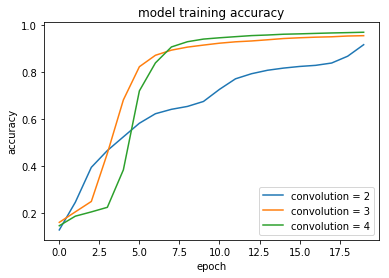

In [113]:
plt.plot(X0.history["acc"])
plt.plot(X1.history["acc"])
plt.plot(X2.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["convolution = 2", "convolution = 3", "convolution = 4"], loc = "best")
plt.show()

# 心得

* 雖然老師上課說一般的神經網路的 convolution 需大於等於 3 ，但由結果可看到在同樣 20 個 epoch 雖然 convolution = 2 的正確率比其他 convolution 較大的情況低，但依然有 90% 以上。
* 由結果可以看到 convoltion 越多時，在 20個 epoch 後正確率提高了。
* 由結果也可以分辨確實 convolution = 2 的正確率上升情況確實與其他兩種期況不同。